# HW1 - Cybersecurity

## picoCTF

# 1. interencdec

    Given String: YidkM0JxZGtwQlRYdHFhR3g2YUhsZmF6TnFlVGwzWVROclh6ZzVNR3N5TXpjNWZRPT0nCg==

    From the tags and the hint provided, we can try a base64 decoding process, since it seems like it was encoded using it. We can use an online base64 decoder or write a python code that does it.

### Option 1: Python Code

In [1]:
import base64

# encoded string
e_str = "YidkM0JxZGtwQlRYdHFhR3g2YUhsZmF6TnFlVGwzWVROclh6ZzVNR3N5TXpjNWZRPT0nCg=="

print(f'encoded string: {e_str}')

# decode the string
d_bytes = base64.b64decode(e_str)

print(f'decoded bytes: {d_bytes}')
# convert the bytes to string
d_str = d_bytes.decode("utf-8") # utf-8 is the encoding

# Print the decoded result
print(f'decoded string from bytes: {d_str}')

encoded string: YidkM0JxZGtwQlRYdHFhR3g2YUhsZmF6TnFlVGwzWVROclh6ZzVNR3N5TXpjNWZRPT0nCg==
decoded bytes: b"b'd3BqdkpBTXtqaGx6aHlfazNqeTl3YTNrXzg5MGsyMzc5fQ=='\n"
decoded string from bytes: b'd3BqdkpBTXtqaGx6aHlfazNqeTl3YTNrXzg5MGsyMzc5fQ=='



The obtained decoded string still looks like it is encrypted. Since the hint to the problem suggests that multiple processes are neccesary for the decryption, we can try to decode it again. Also, the real message appears to be inside the ' symbols, so we can just ignore the "b" at the beginning.

Since another of the tags refers to "caesar" we can suppose that a caesar cypher is needed. 

In [2]:
# decoded string is wrapped inside b'' symbols. 
extracted_str = d_str.strip("b'")

# decode the string once more
d_bytes = base64.b64decode(extracted_str)
print(f'decoded bytes: {d_bytes}')

decoded_str = d_bytes.decode("utf-8")
print(f'decoded (twice) string: {decoded_str}')

decoded bytes: b'wpjvJAM{jhlzhy_k3jy9wa3k_890k2379}'
decoded (twice) string: wpjvJAM{jhlzhy_k3jy9wa3k_890k2379}


To perform the Caesar cipher decryption, we need to shift the letters in the encoded message by a certain number of positions in the alphabet in the reverse direction. Unless we know the shift amount (key), we should tru all possible shifts from 1 to 25 (using the standar alphabet).

In [3]:
def caesar_decrypt(ciphertext, shift):
    decrypted_text = ""
    
    for char in ciphertext:
        if char.isalpha():  # we only work with alphabetic characters
            ascii_offset = 65 if char.isupper() else 97 # deal with lower or uppercase 
            decrypted_text += chr((ord(char) - ascii_offset - shift) % 26 + ascii_offset)
        else:
            decrypted_text += char 

    return decrypted_text

# we try all possible shifts
for shift in range(26):
    decrypted_message = caesar_decrypt(decoded_str, shift)
    print(f"Shift {shift}: {decrypted_message}")

Shift 0: wpjvJAM{jhlzhy_k3jy9wa3k_890k2379}
Shift 1: voiuIZL{igkygx_j3ix9vz3j_890j2379}
Shift 2: unhtHYK{hfjxfw_i3hw9uy3i_890i2379}
Shift 3: tmgsGXJ{geiwev_h3gv9tx3h_890h2379}
Shift 4: slfrFWI{fdhvdu_g3fu9sw3g_890g2379}
Shift 5: rkeqEVH{ecguct_f3et9rv3f_890f2379}
Shift 6: qjdpDUG{dbftbs_e3ds9qu3e_890e2379}
Shift 7: picoCTF{caesar_d3cr9pt3d_890d2379}
Shift 8: ohbnBSE{bzdrzq_c3bq9os3c_890c2379}
Shift 9: ngamARD{aycqyp_b3ap9nr3b_890b2379}
Shift 10: mfzlZQC{zxbpxo_a3zo9mq3a_890a2379}
Shift 11: leykYPB{ywaown_z3yn9lp3z_890z2379}
Shift 12: kdxjXOA{xvznvm_y3xm9ko3y_890y2379}
Shift 13: jcwiWNZ{wuymul_x3wl9jn3x_890x2379}
Shift 14: ibvhVMY{vtxltk_w3vk9im3w_890w2379}
Shift 15: haugULX{uswksj_v3uj9hl3v_890v2379}
Shift 16: gztfTKW{trvjri_u3ti9gk3u_890u2379}
Shift 17: fyseSJV{squiqh_t3sh9fj3t_890t2379}
Shift 18: exrdRIU{rpthpg_s3rg9ei3s_890s2379}
Shift 19: dwqcQHT{qosgof_r3qf9dh3r_890r2379}
Shift 20: cvpbPGS{pnrfne_q3pe9cg3q_890q2379}
Shift 21: buoaOFR{omqemd_p3od9bf3p_890p2379}
Shift 22: atnzNEQ{nl

Checking accross the results, the one that makes sense is when shift is 7: picoCTF{caesar_d3cr9pt3d_890d2379}

### Option 2: using the web

Given that we know the original encripted message should be decrypted using a base64 method, we can search in the web a page that does it for us (without a python code) as follows:

https://www.base64decode.org (website used)


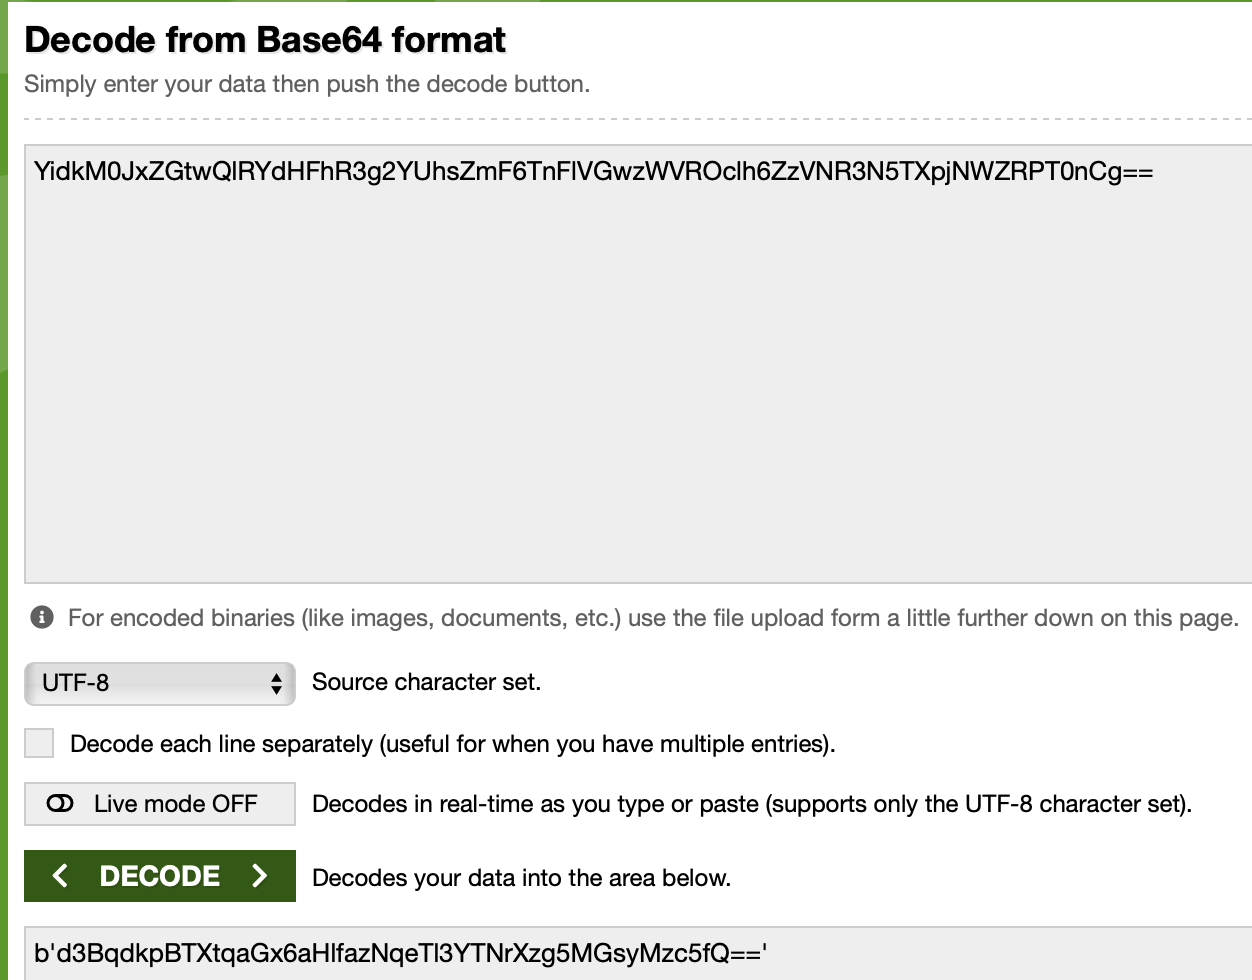

Then once again:

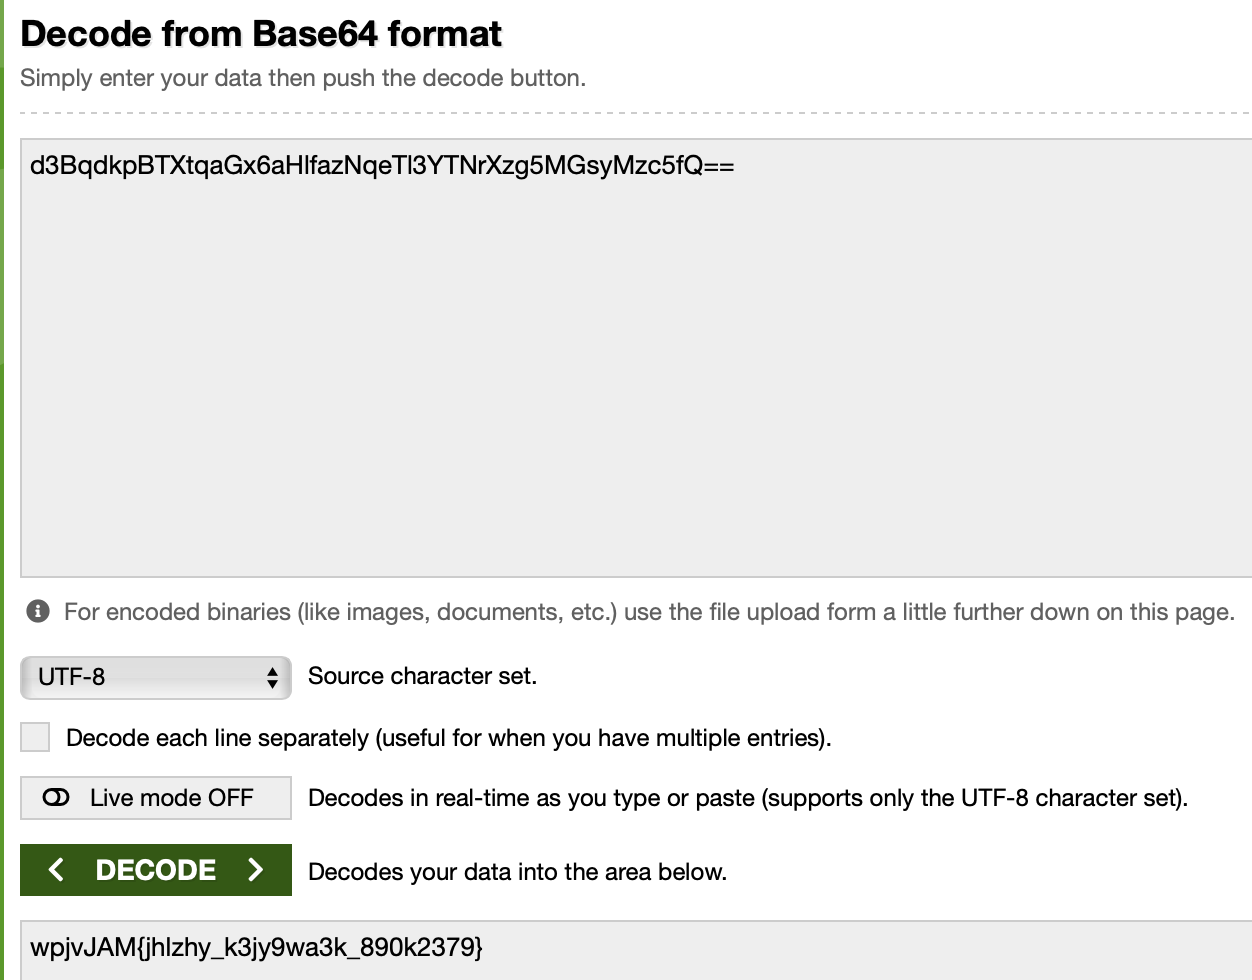

Finally go to a caesar cipher web and use it with the resulting string from the previous steps: 

https://cryptii.com/pipes/caesar-cipher (website used)

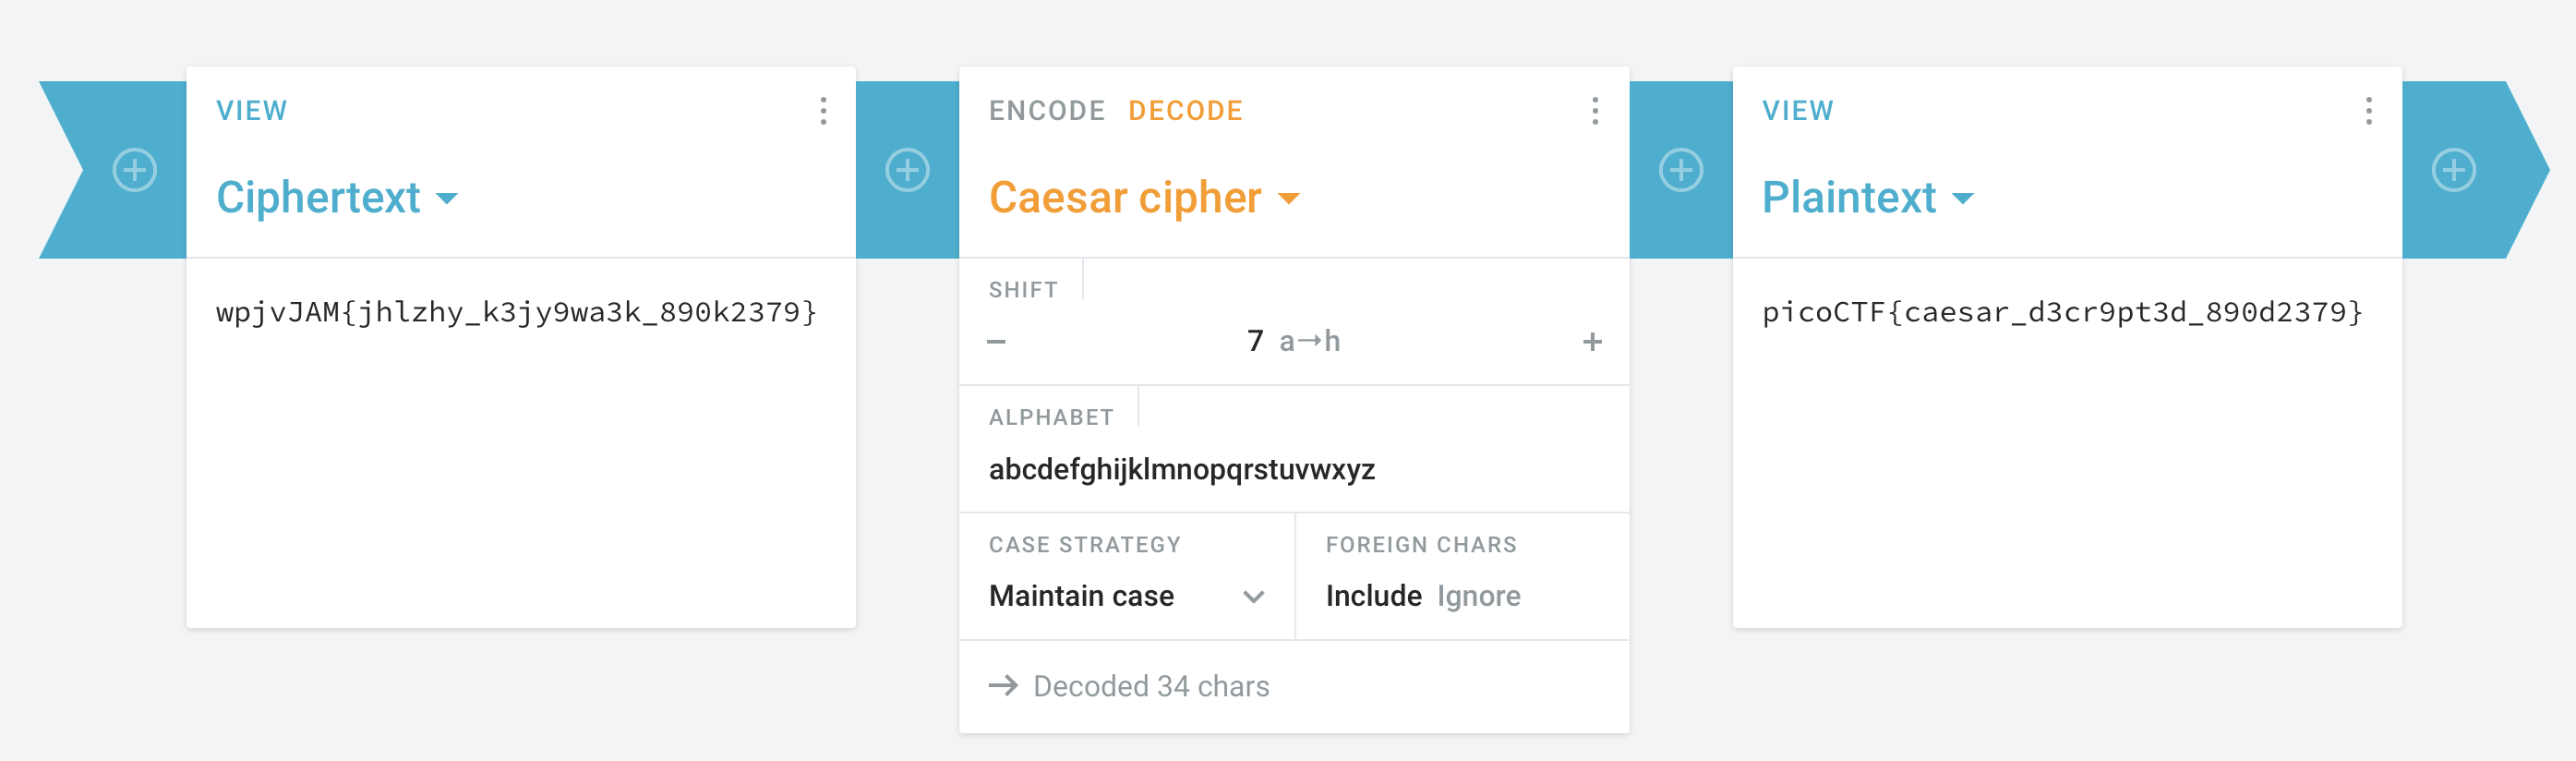

# 2. The Numbers

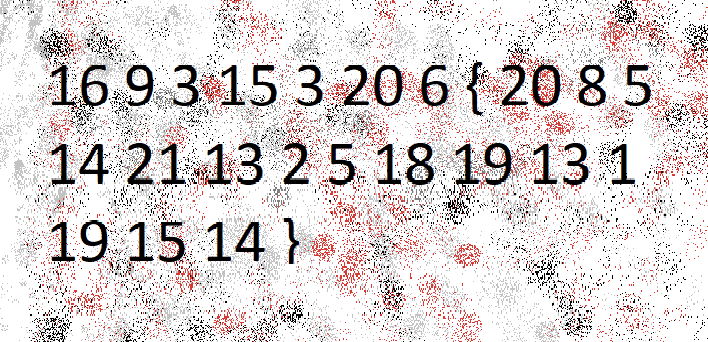

### Option 1: Mapping Numbers and Letters

In [4]:
letters = [chr(i) for i in range(65, 91)]
numbers = [str(i) for i in range(27)]

#original encrypted message

e_message = "16 9 3 15 3 20 6 { 20 8 5 14 21 13 2 5 18 19 13 1 19 15 14 }"

print(f"Encrypted message: {e_message}")

e_message2 = e_message.split(" ")

# decrypt the message
for i in range(len(e_message2)):
    if e_message2[i].isdigit():
        e_message2[i] = letters[numbers.index(e_message2[i])-1]

# print the decrypted message in string form
e_messagef = "".join(e_message2)

print(f"Result: {e_messagef}")

Encrypted message: 16 9 3 15 3 20 6 { 20 8 5 14 21 13 2 5 18 19 13 1 19 15 14 }
Result: PICOCTF{THENUMBERSMASON}


### Option 2: Using ascii offset

In [5]:
e_message = "16 9 3 15 3 20 6 { 20 8 5 14 21 13 2 5 18 19 13 1 19 15 14 }"

e_message2 = e_message.split(" ")

print(f"Encrypted message: {e_message2}")

s = ""
i = 0
for char in e_message2:
    if char.isdigit():
        s += chr(int(char) + 64) # 64 is the ascii offset for uppercase letters
    else:
        s += char

print(f"Result: {s}")

Encrypted message: ['16', '9', '3', '15', '3', '20', '6', '{', '20', '8', '5', '14', '21', '13', '2', '5', '18', '19', '13', '1', '19', '15', '14', '}']
Result: PICOCTF{THENUMBERSMASON}


# 3. C3

### Option 1: Understanding how the encoder works

For this we can try to use the given encoder on a plain text that we know. Since the encoder seems to take into consideration spaces and different lines, we can modify the encoder code in order to receive a .txt file.

The given file for this test looks as follows:

```
picoctf problem
C3 is supposed to be solved
hw1 cybersecurity
```

In [6]:
# Updated encoder to read from the uploaded text file

# Define the lookup tables
lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

#read the txt file
with open('texto1.txt', 'r') as file:
    chars = file.read()

out = ""

prev = 0
# Iterate through each character in the input file
for char in chars:
    if char in lookup1:  # Ensure the character is in lookup1
        cur = lookup1.index(char)  # Find the index in lookup1
        out += lookup2[(cur - prev) % 40]  # Perform the cyclical shift
        prev = cur  # Update the previous character's index
    else:
        out += char  # If the character is not in lookup1, just append it as is

# Output the result to the console
print(out)

jnoMiRgciCrhKnIOjCrhKnIPbKJlCpAtEgtempNODdlqrKdtdbPNmPcRDNBgsSrlLF


Once we understook how the encoder works, and since the problem itself hints that the decoding process depends on the given encoder, we can try to reverse its process, use the encoding message, and check if the result is our known plain text. For this we use the `chars` variable.

In [7]:
# decoder (encoder but reversed)

# Define the lookup tables
lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

chars = "jnoMiRgciCrhKnIOjCrhKnIPbKJlCpAtEgtempNODdlqrKdtdbPNmPcRDNBgsSrlLF"

out = ""
prev = 0
# Iterate through each character in the input file
for char in chars:
    if char in lookup2:  # Ensure the character is in lookup2
        cur = lookup2.index(char)  # Find the index in lookup2
        out += lookup1[(cur + prev) % 40]  # Inverse Perform the cyclical shift
        prev = (cur + prev) % 40  # Update the previous character's index
    else:
        out += char  # If the character is not in lookup2, just append it as is

# Output the result to the console
print(out)

picoctf problem
problem is supposed to be solved
hw1 cybersecurity


With this result we are sure that the decoder developed, just by inversing the process of the given encoder, can be used in order to decrypt the encrypted message given by the problem.

In [8]:
# decoder (encoder but reversed)

# Define the lookup tables
lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

chars = "DLSeGAGDgBNJDQJDCFSFnRBIDjgHoDFCFtHDgJpiHtGDmMAQFnRBJKkBAsTMrsPSDDnEFCFtIbEDtDCIbFCFtHTJDKerFldbFObFCFtLBFkBAAAPFnRBJGEkerFlcPgKkImHnIlATJDKbTbFOkdNnsgbnJRMFnRBNAFkBAAAbrcbTKAkOgFpOgFpOpkBAAAAAAAiClFGIPFnRBaKliCgClFGtIBAAAAAAAOgGEkImHnIl"

out = ""
prev = 0
# Iterate through each character in the input file
for char in chars:
    if char in lookup2:  # Ensure the character is in lookup2
        cur = lookup2.index(char)  # Find the index in lookup2
        out += lookup1[(cur + prev) % 40]  # Inverse Perform the cyclical shift
        prev = (cur + prev) % 40  # Update the previous character's index
    else:
        out += char  # If the character is not in lookup2, just append it as is

# Output the result to the console
print(out)

#asciiorder
#fortychars
#selfinput
#pythontwo

chars = ""
from fileinput import input
for line in input():
    chars += line
b = 1 / 1

for i in range(len(chars)):
    if i == b * b * b:
        print chars[i] #prints
        b += 1 / 1



This decrypted message gives us new hints and a code. The #pythontwo code explains why in the code section we have `print chars[i]` instead of `print(chars[i])`. 

We can assume that, passing a scrypt containing this decrypted message, through the new given code, will give us the real flag in order to solve the problem. 

Once again, we modified the given code in order to read a txt file that contains the encrypted message to be decrypted and that looks as follows:

* contents of texto.txt file:
    ```#asciiorder
    #fortychars
    #selfinput
    #pythontwo

    chars = ""
    from fileinput import input
    for line in input():
        chars += line
    b = 1 / 1

    for i in range(len(chars)):
        if i == b * b * b:
            print chars[i] #prints
            b += 1 / 1

In [9]:
#asciiorder
#fortychars
#selfinput
#pythontwo

#read the txt file
with open('texto.txt', 'r') as file:
    chars = file.read()
b = 1 / 1

decoded_str = ""

for i in range(len(chars)):
    if i == b * b * b:
        decoded_str += chars[i]
        b += 1 / 1
print(decoded_str)

adlibs


Thus, the solved flag would be: **picoCTF{adlibs}**

# 4. Custom Encoder

In [14]:
from random import randint
import sys


def generator(g, x, p):
    return pow(g, x) % p


def encrypt(plaintext, key):
    cipher = []
    for char in plaintext:
        cipher.append(((ord(char) * key*311)))
    return cipher


def is_prime(p):
    v = 0
    for i in range(2, p + 1):
        if p % i == 0:
            v = v + 1
    if v > 1:
        return False
    else:
        return True


def dynamic_xor_encrypt(plaintext, text_key):
    cipher_text = ""
    key_length = len(text_key)
    for i, char in enumerate(plaintext[::-1]):
        key_char = text_key[i % key_length]
        encrypted_char = chr(ord(char) ^ ord(key_char))
        cipher_text += encrypted_char
    return cipher_text


def test(plain_text, text_key):
    p = 97
    g = 31
    if not is_prime(p) and not is_prime(g):
        print("Enter prime numbers")
        return
    a = randint(p-10, p)
    b = randint(g-10, g)
    print(f"a = {a}")
    print(f"b = {b}")
    u = generator(g, a, p)
    v = generator(g, b, p)
    key = generator(v, a, p)
    b_key = generator(u, b, p)
    shared_key = None
    if key == b_key:
        shared_key = key
    else:
        print("Invalid key")
        return
    semi_cipher = dynamic_xor_encrypt(plain_text, text_key)
    cipher = encrypt(semi_cipher, shared_key)
    print(f'cipher is: {cipher}')

In [15]:
message = sys.argv[1]
print(message)
test(message, "trudeau")

--f=/Users/alexperez/Library/Jupyter/runtime/kernel-v33e1d1b05c7fcad13ad12ee7b5da036ec1ff40011.json
a = 97
b = 24
cipher is: [776256, 865824, 179136, 417984, 2239200, 2388480, 2030208, 2030208, 1970496, 1940640, 59712, 89568, 2388480, 656832, 507552, 2030208, 2089920, 2507904, 119424, 149280, 1910784, 656832, 2060064, 477696, 29856, 2597472, 2388480, 507552, 626976, 1940640, 2030208, 0, 119424, 59712, 567264, 2000352, 507552, 1910784, 2507904, 208992, 2388480, 507552, 2060064, 686688, 2089920, 2597472, 567264, 2269056, 746400, 507552, 835968, 208992, 29856, 417984, 2328768, 477696, 746400, 806112, 29856, 298560, 477696, 567264, 2687040, 179136, 686688, 29856, 865824, 626976, 597120, 1880928, 2716896, 328416, 208992, 149280, 686688, 89568, 835968, 1671936, 2776608, 447840, 29856, 686688, 119424, 149280, 358272, 686688, 746400, 149280, 2209344, 537408, 208992, 507552, 29856, 955392, 2239200, 2627328, 208992, 2627328, 2657184]


After understanding how this encoder works, it is possible to try to use the encrypted flag and reverse the encoding process

Encrypted message:

```
a = 94
b = 21
cipher is: [131553, 993956, 964722, 1359381, 43851, 1169360, 950105, 321574, 1081658, 613914, 0, 1213211, 306957, 73085, 993956, 0, 321574, 1257062, 14617, 906254, 350808, 394659, 87702, 87702, 248489, 87702, 380042, 745467, 467744, 716233, 380042, 102319, 175404, 248489]
```

Process in order to obtain the key (we know a, b, p and g):

In [51]:
u = generator(31, 94, 97)
v = generator(31, 21, 97)
key = generator(v, 94, 97)
b_key = generator(u, 21, 97)
shared_key = None
if key == b_key:
    shared_key = key
else:
    print("Invalid key")

print(key)

47


Using the given encrypted message as a string:

In [26]:
s = "131553, 993956, 964722, 1359381, 43851, 1169360, 950105, 321574, 1081658, 613914, 0, 1213211, 306957, 73085, 993956, 0, 321574, 1257062, 14617, 906254, 350808, 394659, 87702, 87702, 248489, 87702, 380042, 745467, 467744, 716233, 380042, 102319, 175404, 248489"
s = s.split(", ")
print(s)
print(len(s))

['131553', '993956', '964722', '1359381', '43851', '1169360', '950105', '321574', '1081658', '613914', '0', '1213211', '306957', '73085', '993956', '0', '321574', '1257062', '14617', '906254', '350808', '394659', '87702', '87702', '248489', '87702', '380042', '745467', '467744', '716233', '380042', '102319', '175404', '248489']
34


In [28]:
w = []
for i in s:
    w.append(int(i))

print(w)

[131553, 993956, 964722, 1359381, 43851, 1169360, 950105, 321574, 1081658, 613914, 0, 1213211, 306957, 73085, 993956, 0, 321574, 1257062, 14617, 906254, 350808, 394659, 87702, 87702, 248489, 87702, 380042, 745467, 467744, 716233, 380042, 102319, 175404, 248489]


Reversing the `encrypt` function:

In [42]:
key = 47

def dencrypt(number, k):
    dcipher = number//311
    dcipher = dcipher//k
    dcipher2 = chr(dcipher)
    return dcipher2

j = 0
semi_result = []
for i in w:
    semi_result.append(dencrypt(i, key))
    j += 1
print(semi_result)
print(j)

['\t', 'D', 'B', ']', '\x03', 'P', 'A', '\x16', 'J', '*', '\x00', 'S', '\x15', '\x05', 'D', '\x00', '\x16', 'V', '\x01', '>', '\x18', '\x1b', '\x06', '\x06', '\x11', '\x06', '\x1a', '3', ' ', '1', '\x1a', '\x07', '\x0c', '\x11']
34


Reversing the `dynamic_xor_encrypt` function:

In [50]:
semi_result_string = "".join(semi_result)
text_key = "trudeau"

def dynamic_xor_dencrypt(plaintext, text_key):
    dcipher_text = ""
    key_length = len(text_key)
    for i, char in enumerate(plaintext):
        key_char = text_key[i % key_length]
        dencrypted_char = chr(ord(char) ^ ord(key_char))
        dcipher_text += dencrypted_char
    return dcipher_text

decrypted_message = dynamic_xor_dencrypt(semi_result_string, text_key)
final_decrypted_message = decrypted_message[::-1]
print(f"Decrypted message: {final_decrypted_message}")

Decrypted message: picoCTF{custom_d2cr0pt6d_8b41f976}


# 5. Rotation

### Option 1

Since the problem hint us to use rotation, and by looking at the cipher text given, we can try by using caesar cypher once again:

In [53]:
new_cipher_text = "xqkwKBN{z0bib1wv_l3kzgxb3l_429in00n}"

# we try all possible shifts
for shift in range(26):
    decrypted_message = caesar_decrypt(new_cipher_text, shift)
    print(f"Shift {shift}: {decrypted_message}")

Shift 0: xqkwKBN{z0bib1wv_l3kzgxb3l_429in00n}
Shift 1: wpjvJAM{y0aha1vu_k3jyfwa3k_429hm00m}
Shift 2: voiuIZL{x0zgz1ut_j3ixevz3j_429gl00l}
Shift 3: unhtHYK{w0yfy1ts_i3hwduy3i_429fk00k}
Shift 4: tmgsGXJ{v0xex1sr_h3gvctx3h_429ej00j}
Shift 5: slfrFWI{u0wdw1rq_g3fubsw3g_429di00i}
Shift 6: rkeqEVH{t0vcv1qp_f3etarv3f_429ch00h}
Shift 7: qjdpDUG{s0ubu1po_e3dszqu3e_429bg00g}
Shift 8: picoCTF{r0tat1on_d3crypt3d_429af00f}
Shift 9: ohbnBSE{q0szs1nm_c3bqxos3c_429ze00e}
Shift 10: ngamARD{p0ryr1ml_b3apwnr3b_429yd00d}
Shift 11: mfzlZQC{o0qxq1lk_a3zovmq3a_429xc00c}
Shift 12: leykYPB{n0pwp1kj_z3ynulp3z_429wb00b}
Shift 13: kdxjXOA{m0ovo1ji_y3xmtko3y_429va00a}
Shift 14: jcwiWNZ{l0nun1ih_x3wlsjn3x_429uz00z}
Shift 15: ibvhVMY{k0mtm1hg_w3vkrim3w_429ty00y}
Shift 16: haugULX{j0lsl1gf_v3ujqhl3v_429sx00x}
Shift 17: gztfTKW{i0krk1fe_u3tipgk3u_429rw00w}
Shift 18: fyseSJV{h0jqj1ed_t3shofj3t_429qv00v}
Shift 19: exrdRIU{g0ipi1dc_s3rgnei3s_429pu00u}
Shift 20: dwqcQHT{f0hoh1cb_r3qfmdh3r_429ot00t}
Shift 21: cvpbPGS{e0gng

**Shift number 8 gives us the plain text**: picoCTF{r0tat1on_d3crypt3d_429af00f}

### Option 2

Once again, we can solve this problem by using just a web page, and the fact that the shift is 8

https://cryptii.com/pipes/caesar-cipher (website used) 

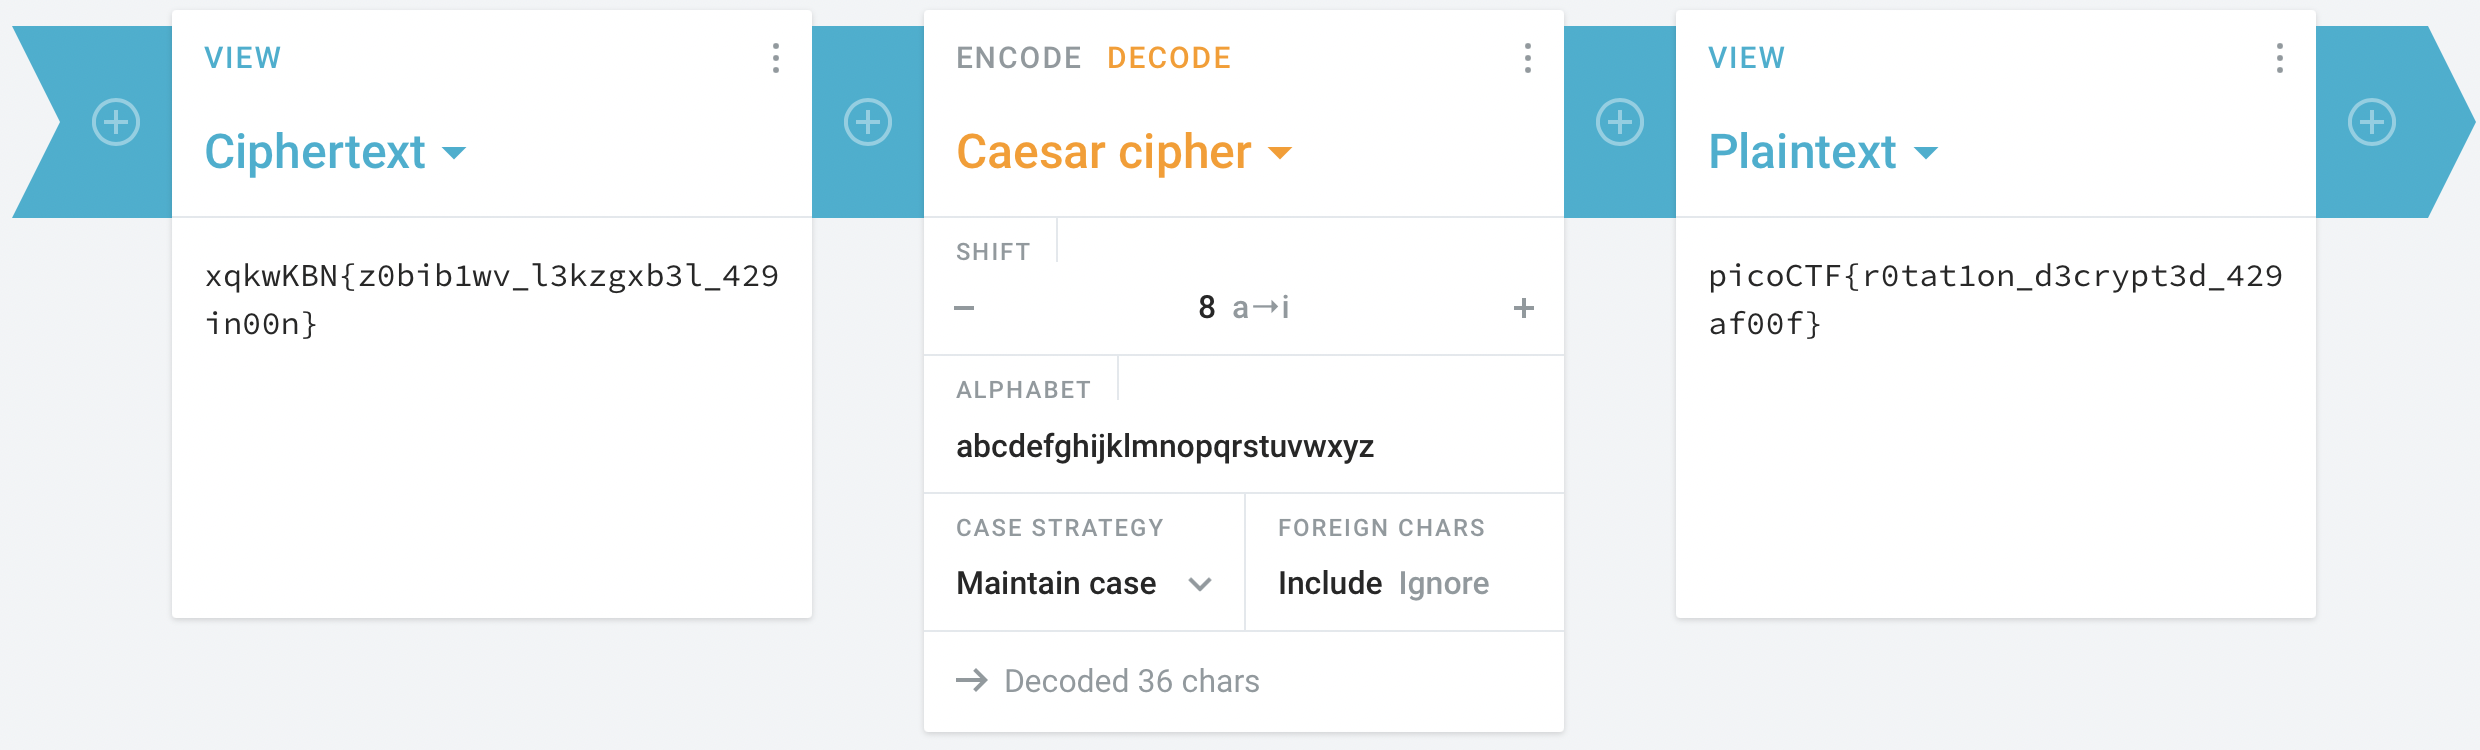